# Football League Table all the possible analysis and model Building

### Importing Liberary and data set of foot ball League 2025

In [1]:
# core libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modeling & evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.inspection import permutation_importance

### 1) Setup & load data

In [2]:
df = pd.read_csv("C:\\Users\\SWAPNIL IWARKAR\\OneDrive\\Desktop\\New folder\\datasets pratices\\premier_league_table_13.csv")
df

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,Arsenal,13,9,3,1,25,7,18,30
1,Manchester City,13,8,1,4,27,12,15,25
2,Chelsea,13,7,3,3,24,12,12,24
3,Aston Villa,13,7,3,3,16,11,5,24
4,Brighton & Hove Albion,13,6,4,3,21,16,5,22
5,Sunderland,13,6,4,3,17,13,4,22
6,Manchester United,13,6,3,4,21,20,1,21
7,Liverpool,13,7,0,6,20,20,0,21
8,Crystal Palace,13,5,5,3,17,11,6,20
9,Brentford,13,6,1,6,21,20,1,19


### 2) Quick EDA & cleaning

In [3]:
df.isna().sum()


Team               0
Played             0
Won                0
Drawn              0
Lost               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
dtype: int64

In [4]:
df.columns

Index(['Team', 'Played', 'Won', 'Drawn', 'Lost', 'Goals For', 'Goals Against',
       'Goal Difference', 'Points'],
      dtype='object')

In [5]:
df.shape

(20, 9)

In [6]:
df.size

180

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team             20 non-null     object
 1   Played           20 non-null     int64 
 2   Won              20 non-null     int64 
 3   Drawn            20 non-null     int64 
 4   Lost             20 non-null     int64 
 5   Goals For        20 non-null     int64 
 6   Goals Against    20 non-null     int64 
 7   Goal Difference  20 non-null     int64 
 8   Points           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [8]:
df.describe()

,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,13.0,5.200000,2.600000,5.200000,18.000000,18.000000,0.00000,18.200000
std,0.0,2.067289,1.231174,2.462348,4.790341,6.043701,9.71705,6.387488
min,13.0,0.000000,0.000000,1.000000,7.000000,7.000000,-21.00000,2.000000
25%,13.0,4.500000,2.000000,3.000000,15.000000,12.750000,-4.50000,15.750000
50%,13.0,5.000000,3.000000,5.000000,17.000000,17.000000,1.00000,19.000000
75%,13.0,6.250000,3.000000,6.250000,21.000000,22.250000,5.00000,22.000000
max,13.0,9.000000,5.000000,11.000000,27.000000,28.000000,18.00000,30.000000


In [9]:
# Check basic info
print(df.shape)
print(df.dtypes)
print(df.isna().sum())

# Example: ensure numeric columns are numeric
numeric_cols = ['Played','Won','Drawn','Lost','Goals For','Goals Against','Goal Difference','Points']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=numeric_cols)  # drop rows with missing numeric values for simplicity

(20, 9)
Team               object
Played              int64
Won                 int64
Drawn               int64
Lost                int64
Goals For           int64
Goals Against       int64
Goal Difference     int64
Points              int64
dtype: object
Team               0
Played             0
Won                0
Drawn              0
Lost               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
dtype: int64


### ✅ 3. Bar Chart – TEAM vs Points

Shows which teams have the highest points.

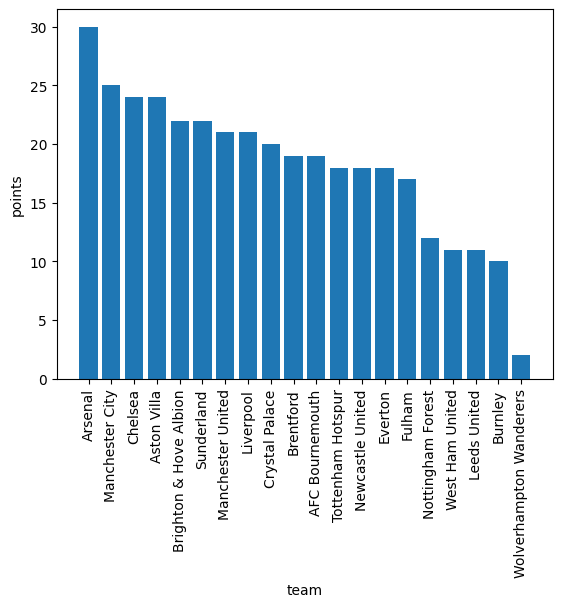

In [10]:
plt.bar(df["Team"], df["Points"])
plt.xticks(rotation=90)
plt.xlabel("team")
plt.ylabel("points")
plt.show()

### ✅ 4. Bar Chart – Goals For vs Goals Against

Helps compare attacking and defensive strengths.

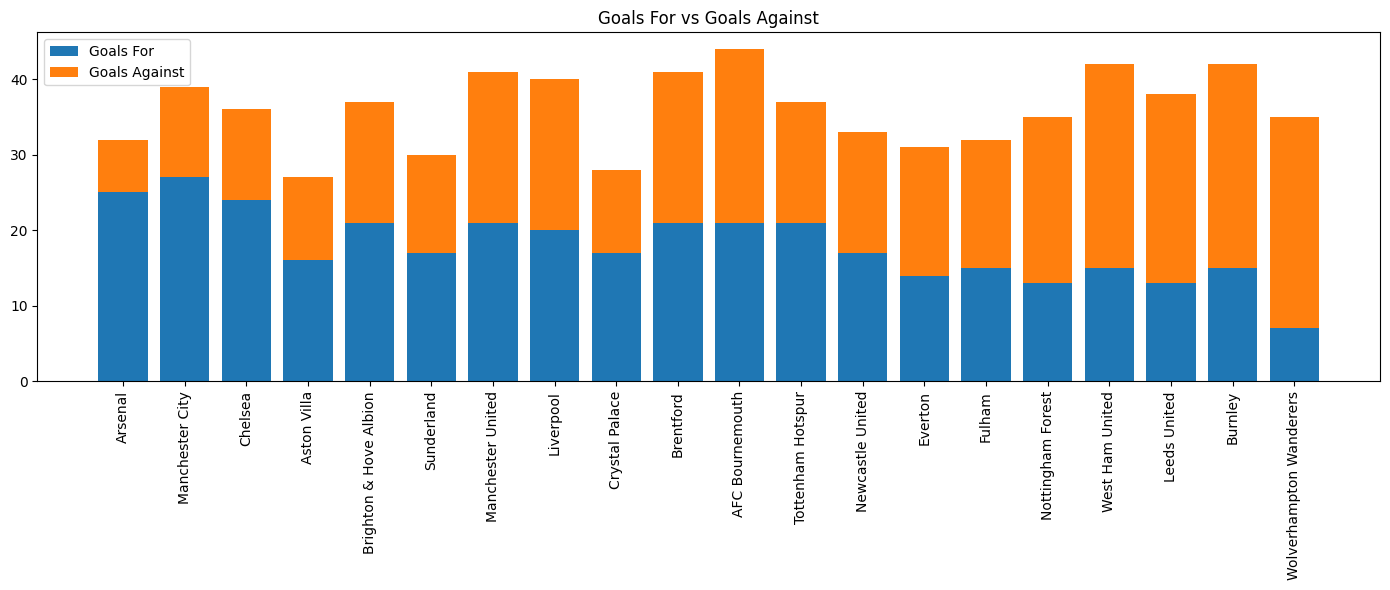

In [11]:
plt.figure(figsize=(14,6))
plt.bar(df['Team'], df['Goals For'], label="Goals For")
plt.bar(df['Team'], df['Goals Against'], label="Goals Against", bottom=df['Goals For'])
plt.xticks(rotation=90)
plt.title("Goals For vs Goals Against")
plt.legend()
plt.tight_layout()
plt.show()


### ✅ 5. Horizontal Bar Chart – Goal Difference

Easy to compare positive vs negative values.

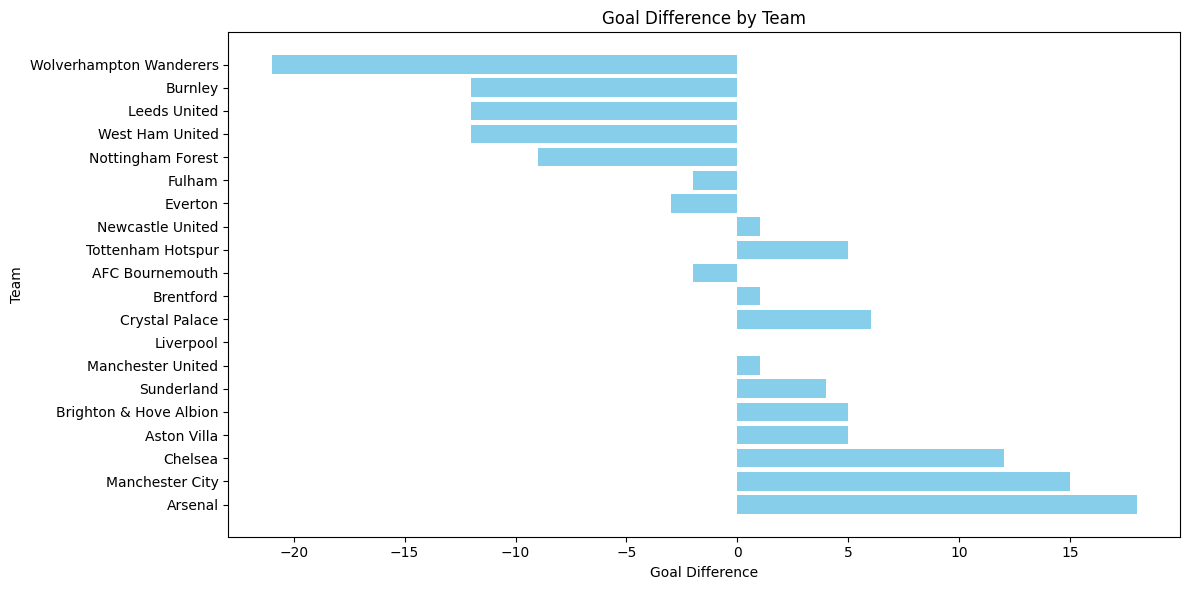

In [12]:
plt.figure(figsize=(12,6))
plt.barh(df['Team'], df['Goal Difference'], color='skyblue')
plt.title("Goal Difference by Team")
plt.xlabel("Goal Difference")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


### ✅ 6. Line Chart – Points Trend by Team Rank

Perfect for showing ranking progression.

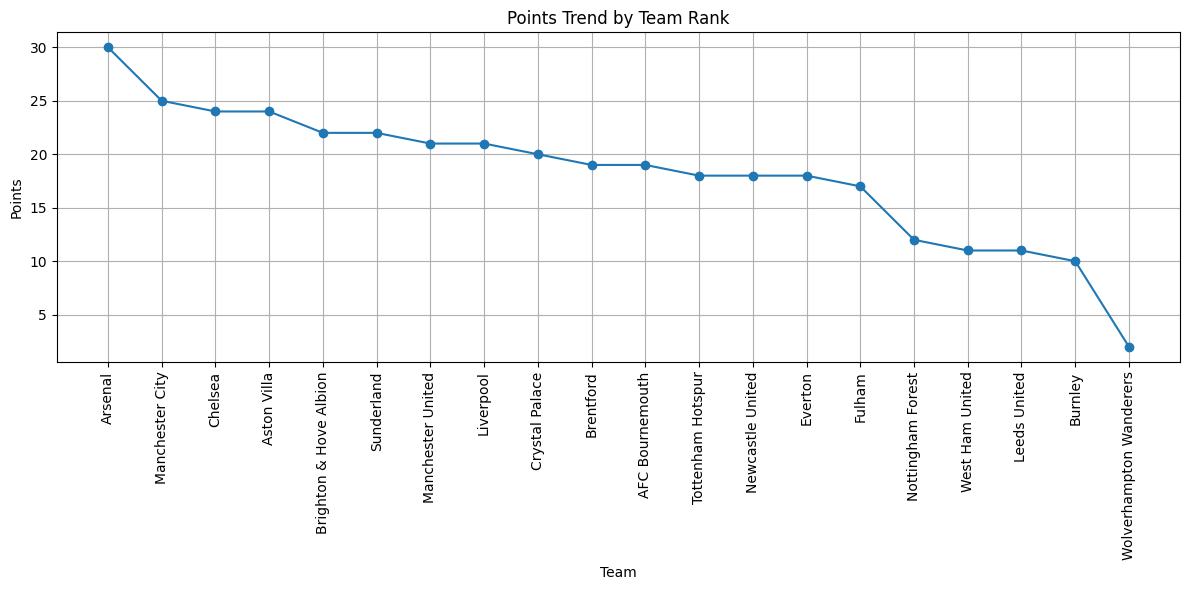

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Team'], df['Points'], marker='o')
plt.xticks(rotation=90)
plt.title("Points Trend by Team Rank")
plt.xlabel("Team")
plt.ylabel("Points")
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ 7. Scatter Plot – Goals Scored vs Points

Shows if scoring more goals leads to more points.

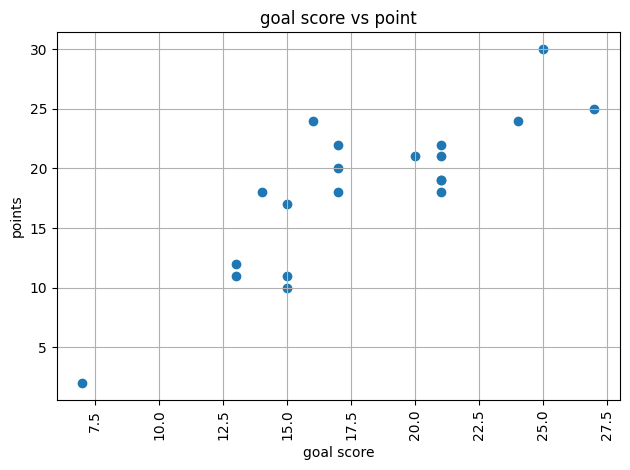

In [14]:
plt.scatter(df["Goals For"], df["Points"],marker="o")
plt.xticks(rotation=90)
plt.title("goal score vs point")
plt.xlabel("goal score")
plt.ylabel("points")
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ 8. Scatter Plot – Goal Difference vs Points

Very useful for performance analytics.

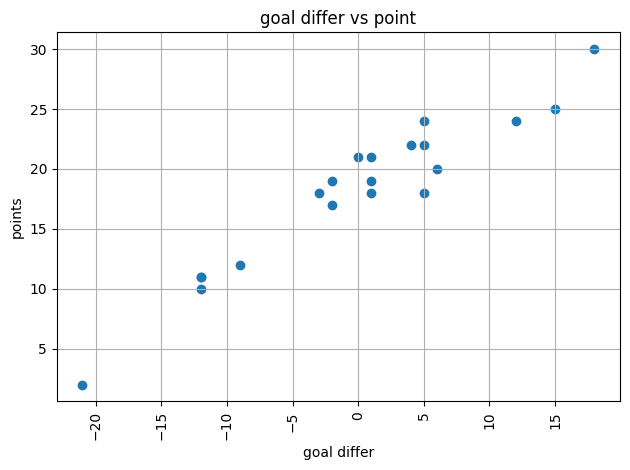

In [15]:
plt.scatter(df["Goal Difference"], df["Points"],marker="o")
plt.xticks(rotation=90)
plt.title("goal differ vs point")
plt.xlabel("goal differ")
plt.ylabel("points")
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ 9. Pie Chart – Win Distribution

Shows % of total league wins contributed by each team.

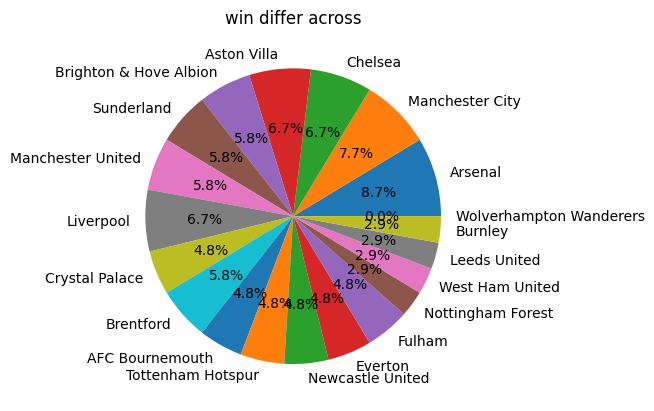

In [16]:
plt.pie(df["Won"],labels=df["Team"],autopct="%1.1f%%")
plt.title("win differ across")
plt.show()

### 🎯 Most Useful Charts for Football Analysis
#### Purpose	                        Best Chart
1) Compare points                 Bar Chart
2) Compare attack strength 	    Goals For Bar Chart
3) Compare defense         	    Goals Against Bar Chart
4) Overall team strength	        Goal Difference Bar
5) Performance quality	            GoalDiff vs Points Scatter
6) Trend by position           	Line Chart
7) Share of wins               	Pie Chart

## 10) Feature engineering (important)

Create features that capture performance ratios and per-game measures — these often boost predictive power.

In [17]:
df['GF_per_game'] = df['Goals For'] / df['Played']
df['GA_per_game'] = df['Goals Against'] / df['Played']
df['Win_pct'] = df['Won'] / df['Played']
df['Draw_pct'] = df['Drawn'] / df['Played']
df['Loss_pct'] = df['Lost'] / df['Played']
df['GD_per_game'] = df['Goal Difference'] / df['Played']

# Rank target for classification: Top4
df['Top4'] = (df['Points'] >= df['Points'].nlargest(4).min()).astype(int)

features = ['Played','Won','Drawn','Lost','Goals For','Goals Against','Goal Difference',
            'GF_per_game','GA_per_game','Win_pct','Draw_pct','Loss_pct','GD_per_game']
X = df[features]
y_reg = df['Points']     # regression target
y_clf = df['Top4']       # classification target

## 11) Train / Test split

In [18]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)  # same split strategy


## 12) Baseline models + cross-validation

Start with simple models to set baseline performance.

In [19]:
# Regression baseline (Ridge) with scaling
reg_pipe = Pipeline([('scaler', StandardScaler()), ('model', Ridge(random_state=42))])
scores = cross_val_score(reg_pipe, X_train, y_train_reg, scoring='neg_root_mean_squared_error', cv=5)
print("Reg baseline RMSE (CV):", -scores.mean())

# Classification baseline (Logistic) with scaling
clf_pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=200))])
scores = cross_val_score(clf_pipe, X_train, y_train_clf, scoring='f1', cv=5)
print("Clf baseline F1 (CV):", scores.mean())


Reg baseline RMSE (CV): 0.40850230730953374
Clf baseline F1 (CV): 0.0


C:\Users\SWAPNIL IWARKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\SWAPNIL IWARKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\SWAPNIL IWARKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no tru

## 13) Stronger models + hyperparameter tuning (RandomizedSearchCV)

Use tree models and tune using RandomizedSearchCV for speed.
### Regression: RandomForest 

In [20]:

reg_model = RandomForestRegressor(random_state=42)
reg_params = {
    'n_estimators': [50,100,200,400],
    'max_depth': [3,5,8, None],
    'min_samples_split': [2,5,10]
}

reg_search = RandomizedSearchCV(reg_model, reg_params, n_iter=20, scoring='neg_root_mean_squared_error', cv=5, random_state=42)
reg_search.fit(X_train, y_train_reg)
print("Best reg params:", reg_search.best_params_)
print("Best reg CV RMSE:", -reg_search.best_score_)


Best reg params: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 8}
Best reg CV RMSE: 1.862071208731112


### Classification: RandomForest 

In [ ]:

clf_model = RandomForestClassifier(random_state=42)
clf_params = {
    'n_estimators': [50,100,200,400],
    'max_depth':[3,5,8,None],
    'min_samples_split':[2,5,10],
    'class_weight':[None,'balanced']
}
clf_search = RandomizedSearchCV(clf_model, clf_params, n_iter=20, scoring='f1', cv=5, random_state=42)
clf_search.fit(X_train, y_train_clf)
print("Best clf params:", clf_search.best_params_)
print("Best clf CV F1:", clf_search.best_score_)

C:\Users\SWAPNIL IWARKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\SWAPNIL IWARKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\SWAPNIL IWARKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no tru

## 14) Evaluate on test set

In [ ]:
# Regression eval
best_reg = reg_search.best_estimator_
y_pred_reg = best_reg.predict(X_test)
#rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
r2 = r2_score(y_test_reg, y_pred_reg)
#print("Test RMSE:", rmse)
print("Test R2:", r2)

# Classification eval
best_clf = clf_search.best_estimator_
y_pred_clf = best_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("F1:", f1_score(y_test_clf, y_pred_clf))
print("ROC AUC (prob):", roc_auc_score(y_test_clf, best_clf.predict_proba(X_test)[:,1]))
print(classification_report(y_test_clf, y_pred_clf))
print("Confusion matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))


Test R2: 0.7985508364312268
Accuracy: 1.0
F1: 1.0
ROC AUC (prob): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion matrix:
 [[2 0]
 [0 2]]


## 15) Feature importance & interpretation

In [ ]:
# Permutation importance (model-agnostic)
imp = permutation_importance(best_reg, X_test, y_test_reg, n_repeats=20, random_state=42)
sorted_idx = imp.importances_mean.argsort()[::-1]
for i in sorted_idx[:10]:
    print(f"{X.columns[i]}: mean_imp={imp.importances_mean[i]:.4f} std={imp.importances_std[i]:.4f}")


Won: mean_imp=0.1436 std=0.0904
Win_pct: mean_imp=0.1215 std=0.0768
Goal Difference: mean_imp=0.1133 std=0.0724
GD_per_game: mean_imp=0.1054 std=0.0680
Loss_pct: mean_imp=0.0906 std=0.0540
Lost: mean_imp=0.0636 std=0.0430
Goals Against: mean_imp=0.0238 std=0.0175
GA_per_game: mean_imp=0.0198 std=0.0157
GF_per_game: mean_imp=0.0129 std=0.0082
Goals For: mean_imp=0.0120 std=0.0076


## 16) Techniques to improve model score (practical tips)

1) More features: include home/away stats, recent form (last 5 games), injuries, expected goals (xG), squad value.

2) Temporal features: rolling averages (last 3/5 matches), streaks.

3) Cross-validation: use repeated CV or time-aware CV if you use temporal features.

4) Ensembling: average predictions from RandomForest + XGBoost + Ridge. Ensembles usually boost performance.

5) Feature selection: remove noisy/correlated features or use PCA if needed.

6) Hyperparameter search: use Bayesian optimization (Optuna) for better tuning.

7) Calibration: for classification probabilities, use Platt scaling / isotonic.

8) Avoid leakage: don’t use future information to predict past points. Always compute features using only information available at prediction time.

9) More data: augment with more seasons or lower leagues if domain permits.

## 17) Simple ensemble (stacking) for regression

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(**reg_search.best_params_, random_state=42)),
]
if xgboost_available:
    estimators.append(('xgb', XGBRegressor(n_estimators=100, random_state=42)))

stack = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack.fit(X_train, y_train_reg)
print("Stack test RMSE:", mean_squared_error(y_test_reg, stack.predict(X_test), squared=False))


✅ Remove duplicates, fix datatypes.

✅ Carefully build time-safe features (no leakage).

✅ Use cross-validation and holdout test set.

✅ Tune hyperparameters & try ensembles.

✅ Inspect feature importance and failure cases.